# Import and merge datasets

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
import seaborn as sns

import scipy.stats as stats
import datetime
import math

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train_2016 = pd.read_csv('train_2016_v2.csv')
#train_2017 = pd.read_csv('F:/Online courses/ds flagdream bootcamp/kaggle project/zillow-prize-1/train_2017.csv')

In [4]:
train_2016.shape

(90275, 3)

In [5]:
prop_2016 = pd.read_csv('properties_2016.csv')

/Users/Xi/Documents/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#the ones in the warning are all object variables
prop_2016.iloc[0:5,[22,32,34,49,55]]

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
0,NaN,010D,NaN,NaN,NaN
1,NaN,0109,LCA11*,NaN,NaN
2,NaN,1200,LAC2,NaN,NaN
3,NaN,1200,LAC2,NaN,NaN
4,NaN,1210,LAM1,NaN,NaN


In [7]:
prop_2016['long'] = prop_2016['longitude']/1000000
prop_2016['lat'] = prop_2016['latitude']/1000000

In [8]:
dic = pd.read_excel('zillow_data_dictionary.xlsx')

In [9]:
prop_2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,long,lat
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,-118.654084,34.144442
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,-118.625364,34.140430
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,-118.394633,33.989359
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,-118.437206,34.148863
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,-118.385816,34.194168


In [10]:
prop_2016.shape

(2985217, 60)

In [147]:
#making a copy here so don't have to merge again if accidentally deleted a column
#new_df_copy = pd.merge(train_2016, prop_2016,how = 'left', on ='parcelid')

In [272]:
#new_df = new_df_copy.copy()

In [ ]:
#new_df.shape

In [ ]:
#new_df.dtypes.reset_index()

In [29]:
#This might be needed when imputing missing value based on neighboring houses. Run  when needed.
new_df = pd.merge(train_2016, prop_2016,how = 'right', on ='parcelid')

In [30]:
new_df.shape

(2985342, 62)

### explore missing values

In [13]:
new_df.isnull().sum().sort_values(ascending = False)

storytypeid                     2983718
basementsqft                    2983714
yardbuildingsqft26              2982695
fireplaceflag                   2980177
architecturalstyletypeid        2979280
typeconstructiontypeid          2978594
finishedsquarefeet13            2977670
buildingclasstypeid             2972713
decktypeid                      2968246
finishedsquarefeet6             2963339
poolsizesum                     2957379
pooltypeid2                     2953267
pooltypeid10                    2948401
taxdelinquencyflag              2928872
taxdelinquencyyear              2928870
hashottuborspa                  2916326
yardbuildingsqft17              2904986
transactiondate                 2895067
logerror                        2895067
finishedsquarefeet15            2794535
finishedsquarefeet50            2782619
finishedfloor1squarefeet        2782619
threequarterbathnbr             2673698
fireplacecnt                    2672695
pooltypeid7                     2499858


In [14]:
missing_df = new_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / new_df.shape[0]
missing_df[missing_df['missing_ratio']>0.80].sort_values(by = 'missing_ratio',ascending = False)

,column_name,missing_count,missing_ratio
43,storytypeid,2983718,0.999456
5,basementsqft,2983714,0.999455
48,yardbuildingsqft26,2982695,0.999113
51,fireplaceflag,2980177,0.998270
4,architecturalstyletypeid,2979280,0.997969
45,typeconstructiontypeid,2978594,0.997740
15,finishedsquarefeet13,2977670,0.997430
8,buildingclasstypeid,2972713,0.995770
11,decktypeid,2968246,0.994273
18,finishedsquarefeet6,2963339,0.992630


# Impute missing variables


## general info
parcelid                            0
transactiondate                     0
assessmentyear                      0
buildingqualitytypeid           32911 impute with median?
yearbuilt                         756 impute with median of the neiborhood?


logerror                            0

### assessmentyear

In [18]:
Counter(new_df.assessmentyear[new_df.assessmentyear.notnull()])

Counter({2015.0: 2972545,
         2014.0: 1306,
         2003.0: 3,
         2012.0: 26,
         2001.0: 3,
         2011.0: 1,
         2013.0: 4,
         2016.0: 1,
         2010.0: 2,
         2004.0: 6,
         2005.0: 2,
         2002.0: 1,
         2000.0: 1,
         2009.0: 2})

In [31]:
#drop assessmentyear because it only had one value in X_train
new_df.drop(['assessmentyear'], axis=1, inplace=True)

### transaction date

In [32]:
#extract weekday from transactiondate, in case there is cyclical trend within a week
#e.g. tractions on Mondays tend to have higher price, etc.
new_df['transactiondate'] = pd.to_datetime(new_df['transactiondate'])
new_df['transactiondate_weekday'] = new_df['transactiondate'].dt.dayofweek


In [33]:
Counter(new_df['transactiondate_weekday'][new_df['transactiondate_weekday'].notnull()])

Counter({4.0: 24047,
         5.0: 225,
         6.0: 882,
         0.0: 11963,
         1.0: 16738,
         2.0: 17658,
         3.0: 18762})

In [34]:
new_df['transactiondate_weekday'].fillna(-1, inplace=True)

In [35]:
Counter(new_df['transactiondate_weekday'][new_df['transactiondate_weekday'].notnull()])

Counter({4.0: 24047,
         5.0: 225,
         6.0: 882,
         0.0: 11963,
         1.0: 16738,
         2.0: 17658,
         3.0: 18762,
         -1.0: 2895067})

/Users/xiliu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xiliu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([11963., 16738.,     0., 17658.,     0., 18762., 24047.,     0.,
          225.,   882.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

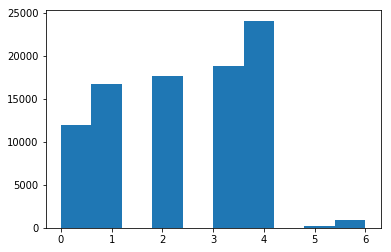

In [18]:
#most transactions happend on weekdays. Increase as approaching the weekend
plt.hist(new_df['transactiondate_weekday'])

### buildingqualitytypeid

In [36]:
new_df['buildingqualitytypeid'].value_counts()

7.0     1133279
4.0      692191
1.0       69472
10.0      39716
12.0       3692
6.0          94
8.0          51
9.0          25
5.0          21
11.0         19
3.0           6
2.0           2
Name: buildingqualitytypeid, dtype: int64

In [37]:
#impute missing variable with median
new_df['buildingqualitytypeid'].fillna(
    np.nanmedian(new_df['buildingqualitytypeid']),
    inplace = True)
new_df['buildingqualitytypeid'].value_counts()

7.0     2180053
4.0      692191
1.0       69472
10.0      39716
12.0       3692
6.0          94
8.0          51
9.0          25
5.0          21
11.0         19
3.0           6
2.0           2
Name: buildingqualitytypeid, dtype: int64

### yearbuilt (unfinished)

In [ ]:
plt.hist(new_df.yearbuilt)

In [ ]:
#impute with median of the tract
#run the tract codes below first

## location related variables
fips                                0
latitude                            0
longitude                           0

rawcensustractandblock              0
censustractandblock               605

regionidcounty                      0 duplicate from fips. remove
regionidcity                     1803 impute with neighboring houses? or others that share the zip code?
regionidzip                        35 impute with neighboring houses
regionidneighborhood            54263 impute with other location ids? or drop? Conclusion: Drop

propertyzoningdesc              31962 impute with propertycountylandusecode (or just drop if they are too correlated)
propertylandusetypeid               0
propertycountylandusecode           1

### longitude and latitude

In [38]:
#Since I divided the longitude and latitude by 1000000 in the prop_2016 data, I will delete the 
#original two variables here.
new_df.drop(['longitude'], axis=1, inplace=True)
new_df.drop(['latitude'], axis=1, inplace=True)

<Figure size 360x360 with 0 Axes>

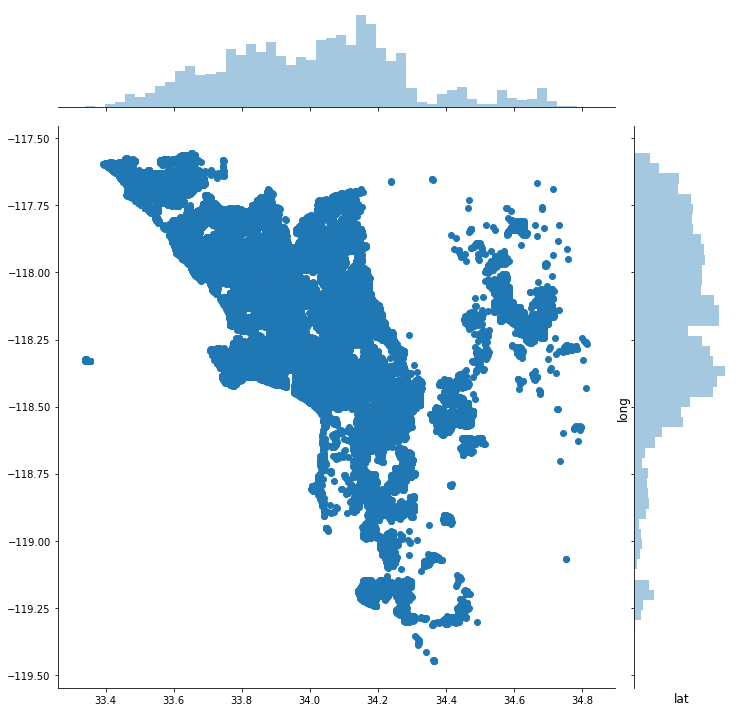

In [35]:
plt.figure(figsize=(5,5))
sns.jointplot(x=new_df.lat.values, y=new_df.long.values, height=10)
plt.ylabel('long', fontsize=12)
plt.xlabel('lat', fontsize=12)
plt.show()

### region ID at various levels

In [39]:
new_df[['fips', 'regionidcounty', 'regionidcity', 'regionidzip', 'regionidneighborhood']].head(20)

,fips,regionidcounty,regionidcity,regionidzip,regionidneighborhood
0,6037.0,3101.0,12447.0,96370.0,31817.0
1,6059.0,1286.0,32380.0,96962.0,NaN
2,6037.0,3101.0,47019.0,96293.0,275411.0
3,6037.0,3101.0,12447.0,96222.0,54300.0
4,6059.0,1286.0,17686.0,96961.0,NaN
5,6037.0,3101.0,29712.0,96109.0,NaN
6,6037.0,3101.0,24174.0,96091.0,NaN
7,6111.0,2061.0,13150.0,97101.0,NaN
8,6059.0,1286.0,25459.0,96987.0,NaN
9,6059.0,1286.0,46098.0,96963.0,NaN


#### regionIDcounty

In [ ]:
#regionidcounty and fips are complete duplicates of each other. drop regionidcounty
pd.crosstab(new_df['fips'],new_df['regionidcounty'])

In [40]:
new_df = new_df.drop(["regionidcounty"], axis=1)

#### regionidzip

In [41]:
pd.crosstab(new_df['fips'],new_df['regionidzip'])

regionidzip,95982.0,95983.0,95984.0,95985.0,95986.0,95987.0,95988.0,95989.0,95991.0,95992.0,95993.0,95994.0,95995.0,95996.0,95997.0,95998.0,95999.0,96000.0,96001.0,96002.0,96003.0,96004.0,96005.0,96006.0,96007.0,96008.0,96009.0,96010.0,96012.0,96013.0,96014.0,96015.0,96016.0,96017.0,96018.0,96019.0,96020.0,96021.0,96022.0,96023.0,96024.0,96025.0,96026.0,96027.0,96028.0,96029.0,96030.0,96034.0,96037.0,96038.0,96039.0,96040.0,96042.0,96043.0,96044.0,96045.0,96046.0,96047.0,96048.0,96049.0,96050.0,96058.0,96068.0,96069.0,96072.0,96083.0,96086.0,96087.0,96088.0,96090.0,96091.0,96092.0,96095.0,96097.0,96100.0,96101.0,96102.0,96103.0,96104.0,96105.0,96106.0,96107.0,96109.0,96110.0,96111.0,96113.0,96114.0,96116.0,96117.0,96119.0,96120.0,96121.0,96122.0,96123.0,96124.0,96125.0,96126.0,96127.0,96128.0,96129.0,96133.0,96134.0,96135.0,96136.0,96137.0,96148.0,96149.0,96150.0,96151.0,96152.0,96159.0,96160.0,96161.0,96162.0,96163.0,96169.0,96170.0,96171.0,96172.0,96173.0,96174.0,96180.0,96181.0,96183.0,96185.0,96186.0,96190.0,96192.0,96193.0,96197.0,96201.0,96203.0,96204.0,96206.0,96207.0,96208.0,96210.0,96212.0,96213.0,96215.0,96216.0,96217.0,96218.0,96220.0,96221.0,96222.0,96225.0,96226.0,96228.0,96229.0,96230.0,96234.0,96236.0,96237.0,96238.0,96239.0,96240.0,96241.0,96242.0,96244.0,96245.0,96246.0,96247.0,96258.0,96265.0,96267.0,96268.0,96270.0,96271.0,96273.0,96275.0,96278.0,96280.0,96282.0,96284.0,96289.0,96291.0,96292.0,96293.0,96294.0,96295.0,96296.0,96313.0,96320.0,96321.0,96322.0,96323.0,96324.0,96325.0,96326.0,96327.0,96329.0,96330.0,96336.0,96337.0,96338.0,96339.0,96341.0,96342.0,96346.0,96349.0,96351.0,96352.0,96354.0,96355.0,96356.0,96361.0,96364.0,96366.0,96368.0,96369.0,96370.0,96371.0,96373.0,96374.0,96375.0,96377.0,96378.0,96379.0,96383.0,96384.0,96385.0,96387.0,96389.0,96393.0,96395.0,96398.0,96401.0,96403.0,96410.0,96411.0,96412.0,96414.0,96415.0,96420.0,96424.0,96426.0,96433.0,96434.0,96436.0,96437.0,96438.0,96446.0,96447.0,96449.0,96450.0,96451.0,96452.0,96453.0,96464.0,96465.0,96467.0,96469.0,96473.0,96474.0,96475.0,96478.0,96479.0,96480.0,96485.0,96486.0,96488.0,96489.0,96490.0,96492.0,96494.0,96496.0,96497.0,96500.0,96505.0,96506.0,96507.0,96508.0,96510.0,96513.0,96514.0,96515.0,96517.0,96522.0,96523.0,96524.0,96525.0,96531.0,96533.0,96859.0,96939.0,96940.0,96941.0,96943.0,96946.0,96947.0,96948.0,96951.0,96952.0,96953.0,96954.0,96956.0,96957.0,96958.0,96959.0,96961.0,96962.0,96963.0,96964.0,96965.0,96966.0,96967.0,96969.0,96971.0,96973.0,96974.0,96975.0,96978.0,96979.0,96980.0,96981.0,96982.0,96983.0,96985.0,96986.0,96987.0,96988.0,96989.0,96990.0,96993.0,96995.0,96996.0,96998.0,97001.0,97003.0,97004.0,97005.0,97006.0,97007.0,97008.0,97016.0,97018.0,97020.0,97021.0,97023.0,97024.0,97025.0,97026.0,97027.0,97035.0,97037.0,97039.0,97040.0,97041.0,97043.0,97047.0,97048.0,97050.0,97051.0,97052.0,97059.0,97063.0,97064.0,97065.0,97066.0,97067.0,97068.0,97078.0,97079.0,97081.0,97083.0,97084.0,97088.0,97089.0,97091.0,97092.0,97094.0,97096.0,97097.0,97098.0,97099.0,97101.0,97104.0,97106.0,97107.0,97108.0,97109.0,97111.0,97113.0,97116.0,97118.0,97119.0,97164.0,97177.0,97185.0,97298.0,97316.0,97317.0,97318.0,97319.0,97323.0,97324.0,97328.0,97329.0,97330.0,97331.0,97336.0,97339.0,97344.0,399675.0
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6037.0,7158,7479,9049,5460,2096,3140,2467,5646,617,10122,2514,895,414,2687,8446,532,6684,8352,2235,226,8671,4641,8811,8185,8707,5943,1406,2178,4890,8604,3633,6396,5626,4238,6431,1744,7059,2147,5911,11703,10668,12278,10054,9302,12340,5065,11376,1,2612,992,196,6525,4305,5691,7438,7649,9582,12150,1905,7258,7684,3846,1,2,2037,7902,8121,189

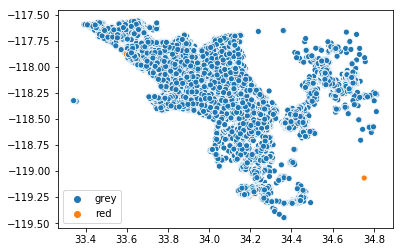

In [70]:
#the missing values are very scattered --> can use houses in the vicinity to impute.
#Also, they don't overlap with the missing values of cityID. great! Can use zip to impute cityID
sns.scatterplot(x=new_df.lat.values, y=new_df.long.values, hue=['grey' if ~np.isnan(x) else 'red' for x in new_df.regionidzip],
                     data=new_df)

In [42]:
parcelid_missingregionIDzip = new_df.loc[new_df['regionidzip'].isna(), 'parcelid']
parcelid_missingregionIDzip

1408        17188934
6690        17188954
8152        17188868
13544       14752466
16588       17290656
16783       17058339
21370       17188974
24446       17115892
24462       14700874
26944       17188846
27089       14752449
28600       14312970
28875       17199288
29274       17188855
31163       17188966
32423       17188857
38752       17188844
39616       17188862
39774       17199279
40648       17188858
47432       17188847
48635       17188848
49534       17188851
60338       17199303
61488       17072015
66016       17188859
67134       17229183
67880       17199312
68625       14720386
69572       17199093
             ...    
2985312    167636430
2985313    167690630
2985314    167636630
2985315     10834030
2985316    167637430
2985317    167637630
2985318    167637230
2985319     11645030
2985320    167689030
2985321    167638630
2985322    167638430
2985323     14342030
2985324    167638230
2985325    167637830
2985326    167639230
2985327     14341030
2985328     1

In [23]:
def findNeighbor (target_house_list, radius, data):
    ''' this function finds all neighboring houses within a set radius (in kilometers) of the 
    target house (a list) from the data, and save their IDs (a list)
    data contains a column of longitudes and a column of latitudes
    make sure that data contains the feature you want to impute as well, for the next step
    Also, it makes sense to use the prop_2016 df here since it contains more info and we don't care whether the house was sold
    '''
    R = 6373.0
    
    neighbors = []
    for h in target_house_list:
        target_long = np.radians(data.loc[data['parcelid'] == h, 'long'].values)
        target_lat = np.radians(data.loc[data['parcelid'] == h, 'lat'].values)
        
        d_long = sum(-target_long, np.radians(data['long']))
        d_lat = sum(-target_lat, np.radians(data['lat']))
        
        a = np.sin(d_lat/2)**2 + np.cos(target_lat)*np.cos(np.radians(data['lat']))*np.sin(d_long/2)**2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
        data['distance'] = R * c
        
        n = list(data.loc[data['distance'] <= radius, 'parcelid'])
        neighbors.append(n)
    
    return neighbors

In [24]:
def imputeFromNeighbor (target_house_list, radius, 
                        source_data, output_data, 
                        features_to_impute, method):
    '''this function imputes a list of features from the neiboring houses as determined by
    the function findNeighbor
    method is either "mode" or "median"
    for the list of features the impute method has to be the same
    '''
    neighbors = findNeighbor(target_house_list, radius, source_data)
    target = target_house_list
    
    v=[]
    for f in features_to_impute:
        for t_n_pair in list(zip(target, neighbors)):
            
            feature_val = output_data.loc[output_data['parcelid'].isin(t_n_pair[1]), f]
            
            if method == 'mode':
                majority_vote= np.asscalar(stats.mode(feature_val)[0])
                output_data[f].fillna(majority_vote, inplace=True)
                v.append(majority_vote)
                
            
            if method == 'median':
                median_value = np.nanmedian(feature_val[0])
                output_data[f].fillna(median_value, inplace=True)
                v.append(median_value)
                
    print ('done with missing value imputation')

In [26]:
#don't do this just yet, because in the model we've taken out the regionidzip because of too many categories. 
# for now.
imputeFromNeighbor(parcelid_missingregionIDzip, 5, prop_2016, new_df, ['regionidzip'], 'mode')

KeyboardInterrupt: 

In [169]:
#check to see if imputed correctly:
sum(new_df.regionidzip.isna())

0

### regionidcity (unfinished)

In [ ]:
pd.crosstab(new_df['fips'],new_df['regionidcity'])
#a same city almost always only has one fips code. except for a couple.

In [ ]:
print('regionidcity levels: ', len(new_df.regionidcity.value_counts()))
print('regionidzip levels: ', len(new_df.regionidzip.value_counts()))
#zip code breaks down in a finer level than cityid, and it has fewer missing value. Can impute cityID with 
#the mode of the cityIDs of the houses that share the same zipcode?

In [ ]:
#the missing values are quite scattered, except for two clusters. For the clusters it doesn't make sense 
# to impute from neighbors.
# below I will impute based on others that share the same regionidzip.
sns.scatterplot(x=new_df.lat.values, y=new_df.long.values, hue=['grey' if ~np.isnan(x) else 'red' for x in new_df.regionidcity],
                     data=new_df)

In [ ]:
testset[regionidcity].fillna(loan[f], inplace=False)

In [244]:
#zipcodes of the houses that are missing regionidcity
a = testset.loc[testset['regionidcity'].isnull(), 'regionidzip']
#houses that share the zipcodes in a
testset[testset['regionidzip'].isin(a)]
#count the majority vote of regionidcity within each regionidzip
(testset.groupby(['regionidzip'])['regionidcity'].agg(lambda x: list(pd.Series.mode(x)))).reset_index()
#how to fillna by group?
#https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

,regionidzip,regionidcity
0,95982.0,"[12447.0, 396053.0]"
1,95983.0,[12447.0]
2,95984.0,[12447.0]
3,95985.0,[12447.0]
4,95986.0,[12447.0]
5,95987.0,[12447.0]
6,95988.0,[12447.0]
7,95989.0,[12447.0]
8,95992.0,[12447.0]
9,95993.0,[12447.0]


#### impute regionIDneighborhood

In [ ]:
#Are the regionIDneighborhood missing in particular regions?
#grey dots are the missing neighborhoodIDs out of all datapoints

plt.figure(figsize=(12,12))

p = sns.jointplot(
    x=new_df.lat.values, y=new_df.long.values, height=10
    )

p.x = new_df[new_df['regionidneighborhood'].notna()].lat.values
p.y = new_df[new_df['regionidneighborhood'].notna()].long.values
p.plot_joint(plt.scatter, marker='x', c='grey', s=8)


plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
#Should the missing regionidneighborhood be its own category?
temp = ['missing' if np.isnan(x) else 'notMissing' for x in new_df.regionidneighborhood] 

sns.violinplot(x=temp, y="logerror", data=new_df)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('regionidneighborhood missing v.s. not', fontsize=12)
#plt.xticks(rotation='vertical')
plt.title("should the missing regionidneighborhood be its own category?", fontsize=15)
plt.show()

In [ ]:
d = {'logerror': new_df.logerror, 'temp': temp}
df = pd.DataFrame(data=d)
stats.ttest_ind(df[df['temp']=='missing']['logerror'], df[df['temp']=='notMissing']['logerror'])

In [ ]:
#pink is 12447. Overlaps with the missing regionIDneighborhood the most
sns.scatterplot(x=new_df.lat.values, y=new_df.long.values, hue=[x if ~np.isnan(x) else 'grey' for x in new_df.regionidcity],
                     data=new_df)

In [ ]:
new_df.regionidzip = new_df.regionidzip.astype('category')

In [ ]:
plt.figure(figsize=(12,12))


sns.scatterplot(x=new_df.lat.values, y=new_df.long.values, hue=[x if ~np.isnan(x) else 'grey' for x in new_df.regionidzip],
                     data=new_df)

It seems that regionIDneighborhood mostly are missing for regionIDcity=12447. There is no difference in logerror between groups that had or had not missing value for this variable. 
Also, there are so many location related predictors that have fewer missing values. already.

Therefore, I think it is pretty safe to drop regionIDneighborhood. 

In [43]:
new_df = new_df.drop('regionidneighborhood', axis=1)

#### census tract & block id
rawcensustractandblock              0
censustractandblock               605

In [ ]:
#skip this section for now. Because again, the models file currently just drops tract and block, because there are too many levels.

In [ ]:
new_df[['fips', 'rawcensustractandblock', 'censustractandblock']].head()

The "Census Tract" is an area roughly equivalent to a neighborhood established by the Bureau of Census for analyzing populations. They generally encompass a population between 2,500 to 8,000 people. Bureau of Census describes them as "relatively permanent", but they do change over time

A census block group is a set of one or more contiguous census blocks sharing the same first digit of the census block geocode within one census tract. The block group geography is the smallest geographic area for which American Community Survey data are tabulated (5 year estimates).

Because I don't know what the difference is between the raw number and the non-raw number, I'm extracting the most unique information and saving them as below, for now. Waiting for more domain knowledge.

In [ ]:
#change censusblockid to character and extract the tract and block number
#FIPS Code (6037) - Tract Number (8002.04) - And block Number (1)
new_df['tract'] = [str(float(r))[4:11] for r in new_df['rawcensustractandblock']]
new_df['block_raw'] = [str(float(r))[11:] for r in new_df['rawcensustractandblock']]

new_df['block_calc'] = [str(float(r))[10:14] if ~np.isnan(r) else np.nan for r in new_df['censustractandblock']]


In [ ]:
new_df[pd.isna(new_df['block_calc'])][['tract','block_raw','block_calc']]

Comparing the rawcensustractandblock with censustractandblock, they seem to have the same tract number, but the block numbers are different (not sure how or why).

If no further information will be given about the blocks, I will for now only keep the tract and block extracted from censustractandblock, and impute the missing values (n=605) from rawcensustractandblock by keeping the first 4 digits and padding with 0s for those that doesn't have 4 digits

In [ ]:
#pad with trailing 0s to get to 4 digits
new_df.block_raw = [r.ljust(4, '0') for r in new_df['block_raw']]
#take only the first 4 digits
new_df.block_raw = [r[:4] for r in new_df.block_raw]

In [ ]:
new_df['block'] = new_df['block_calc'].fillna(new_df['block_raw'], inplace=False)

In [ ]:
new_df.drop(['rawcensustractandblock','censustractandblock','block_raw','block_calc'], axis=1, inplace=True)

### size related variables

roomcnt                             0
bedroomcnt                          0



lotsizesquarefeet               10150 impute with other lots in the neighborhood


calculatedfinishedsquarefeet      661 similar to "finishedsquarefeet12"?
finishedsquarefeet12             4679 impute with neighborhood median?
finishedsquarefeet13            90242 This is the perimeter of living area. Nice to have, but information is probably also in "finished squarefeet 12"
finishedsquarefeet15            86711 total area. 
finishedsquarefeet6             89854 area, including unfinished area as well.      Impute with finishedsquarefeet 15 (total area)? Or drop...
finishedsquarefeet50            83419 finished area on first floor. If numberofstories=0 then impute with finishedsquarefeet12?
finishedfloor1squarefeet        83419 identical to finishedsquarefeet50?


basementsqft                    90232 See if missing at random. Possible to impute with neiboring houses and archetechture style?


yardbuildingsqft26              90180 size of the shed, if any. Missing = 0?
yardbuildingsqft17              87629 size of the patio, if there is any. so missing = no patio?


bathroomcnt                         0
fullbathcnt                      1182 number of full bathrooms. impute with "bathroomcnt"?
calculatedbathnbr                1182 duplicate of "bathroomcnt"?
threequarterbathnbr             78266 missing = 0


In [ ]:
sizef = ['roomcnt', 'bedroomcnt', 'bathroomcnt', 'fullbathcnt', 'calculatedbathnbr','threequarterbathnbr',
         'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13',
         'finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet50', 'finishedfloor1squarefeet',
         'basementsqft', 'yardbuildingsqft26', 'yardbuildingsqft17'
        ]
size_df = new_df[sizef]
correlation = size_df.corr()
correlation

In [ ]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})

#### Bathrooms

In [44]:
new_df[new_df['fullbathcnt'].isnull()][['bathroomcnt']]

,bathroomcnt
126,0.0
174,0.0
231,0.0
293,0.0
299,0.0
303,0.0
313,0.0
382,0.0
387,0.0
727,0.0


In [45]:
#calculated count is a complete duplication of bathroomcnt. drop calculated
pd.crosstab(new_df['bathroomcnt'],new_df['calculatedbathnbr'])

calculatedbathnbr,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,14.0,14.5,15.0,16.0,17.0,18.0,19.0,19.5,20.0
bathroomcnt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,499343,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.5,0,45566,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,1218701,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.5,0,0,0,206570,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,629377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.5,0,0,0,0,0,30671,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,0,0,0,0,0,0,132082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.5,0,0,0,0,0,0,0,18961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,0,38244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
#impute missing three-quarterbath with 0
new_df['threequarterbathnbr'].fillna(0, inplace=True)

In [47]:
#impute missing fullbathroomcnt with bathroomcnt
new_df['fullbathcnt'].fillna(new_df['bathroomcnt'], inplace=True)

In [48]:
#fullbathroomcnt and bathroomcnt are almost perfectly correlated. However, their difference 
#still contains valuable information. 
#create a non-fullbath variable to capture that, then drop the full-bathroom variable
sum(new_df['fullbathcnt']-new_df['bathroomcnt'])

nan

In [49]:
new_df['non-fullbathcnt'] = new_df['bathroomcnt']-new_df['fullbathcnt']

In [50]:
#turns out that the existing 'threequarterbathnbr' entirely captures our newly created non-fullbathcnt.
#drop 'non-fullbathcnt'
pd.crosstab(new_df['non-fullbathcnt'], new_df['threequarterbathnbr'])

threequarterbathnbr,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
non-fullbathcnt,,,,,,,,
0.0,2662236,0,0,0,0,0,0,0
0.5,0,308972,0,0,0,0,0,0
1.0,0,0,2338,0,0,0,0,0
1.5,0,0,0,261,0,0,0,0
2.0,0,0,0,0,46,0,0,0
2.5,0,0,0,0,0,16,0,0
3.0,0,0,0,0,0,0,9,0
3.5,0,0,0,0,0,0,0,2


In [51]:
new_df.drop(['calculatedbathnbr'], axis =1, inplace = True)
new_df.drop(['fullbathcnt'], axis =1, inplace = True)
new_df.drop(['non-fullbathcnt'], axis =1, inplace = True)

### tax related variables
taxdelinquencyyear              88492 missing = no delinquency? (i.e. 0)
taxdelinquencyflag              88492 missing = no delinquency? (i.e. 0)
structuretaxvaluedollarcnt        380
taxamount                           6
landtaxvaluedollarcnt               1
taxvaluedollarcnt                   1

#'structuretaxvaluedollarcnt' = 'taxvaluedollarcnt' - 'landtaxvaluedollarcnt'

In [52]:
#summarise all non-missing values for taxdelinquencyyear
Counter(new_df[[pd.notnull(x) for x in new_df.taxdelinquencyyear]].taxdelinquencyyear)

Counter({13.0: 4633,
         15.0: 26071,
         12.0: 3125,
         14.0: 16828,
         10.0: 1552,
         9.0: 1016,
         8.0: 501,
         11.0: 2351,
         7.0: 236,
         6.0: 71,
         99.0: 4,
         2.0: 4,
         92.0: 5,
         5.0: 23,
         3.0: 5,
         4.0: 16,
         95.0: 5,
         91.0: 2,
         93.0: 3,
         98.0: 3,
         82.0: 1,
         79.0: 2,
         94.0: 2,
         97.0: 2,
         90.0: 2,
         0.0: 2,
         1.0: 2,
         87.0: 1,
         84.0: 1,
         86.0: 1,
         88.0: 1,
         96.0: 1})

In [53]:
#recode missing into 0
#delete the taxdelinquencyflag because all the info is already included in taxdelinquencyyear
new_df['taxdelinquencyyear'].fillna(0, inplace=True)

In [54]:
Counter(new_df['taxdelinquencyyear'])

Counter({0.0: 2928872,
         13.0: 4633,
         15.0: 26071,
         12.0: 3125,
         14.0: 16828,
         10.0: 1552,
         9.0: 1016,
         8.0: 501,
         11.0: 2351,
         7.0: 236,
         6.0: 71,
         99.0: 4,
         2.0: 4,
         92.0: 5,
         5.0: 23,
         3.0: 5,
         4.0: 16,
         95.0: 5,
         91.0: 2,
         93.0: 3,
         98.0: 3,
         82.0: 1,
         79.0: 2,
         94.0: 2,
         97.0: 2,
         90.0: 2,
         1.0: 2,
         87.0: 1,
         84.0: 1,
         86.0: 1,
         88.0: 1,
         96.0: 1})

In [55]:
new_df['taxdelinquencyflag'].fillna(0, inplace=True)

In [56]:
new_df[new_df.structuretaxvaluedollarcnt.isna()][['structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt']]

,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxvaluedollarcnt
101,NaN,3020077.0,3020077.0
126,NaN,204653.0,204653.0
231,NaN,80609.0,80609.0
293,NaN,116000.0,116000.0
303,NaN,743565.0,743565.0
319,NaN,382492.0,382492.0
382,NaN,123342.0,123342.0
592,NaN,114755.0,114755.0
858,NaN,81968.0,81968.0
1220,NaN,169700.0,169700.0


In [57]:
#this shows that the three variables are linearly dependent
#don't run this! takes toooooo long
Counter(new_df['structuretaxvaluedollarcnt'] + new_df['landtaxvaluedollarcnt'] - new_df['taxvaluedollarcnt'])

KeyboardInterrupt: 

In [58]:
#impute structuretax with totaltax-landtax, then delete total tax
new_df['structuretaxvaluedollarcnt'].fillna(new_df['taxvaluedollarcnt']-new_df['landtaxvaluedollarcnt'], inplace = True)

In [59]:
sum(new_df.structuretaxvaluedollarcnt.isna())

42550

In [60]:
new_df.drop(['taxvaluedollarcnt'], axis =1, inplace = True)

### equipments (other than room sqft) and building type related variables
buildingclasstypeid             90259 This is related to fire prevention. Doesn't seem too relevant to the housing value
decktypeid                      89617 missing might mean there is no deck. 
airconditioningtypeid           61494 impute with median
heatingorsystemtypeid           34195 impute with median 
storytypeid                     90232 Type of floor. See if missing at random
numberofstories                 69705
architecturalstyletypeid        90014 E.g. ranch, highrise, etc. Impute with other houses in the neiborhood? (Might be very inaccurate though...)
typeconstructiontypeid          89976 material and stype of the build. Consider combine this with architecturalstyletypeid if they are complementary?
unitcnt                         31922 联排/双拼/独栋, etc.

fireplaceflag                   90053 Only coded "true". i.e. missing = false.
fireplacecnt                    80668

garagecarcnt                    60338 missing = 0?

poolcnt                         72374 missing = 0
poolsizesum                     89306 missing = 0
pooltypeid2                     89071 missing = 0 'pool with spa or hottub
pooltypeid7                     73578 missing = 0 'pool without hottub
pooltypeid10                    89114 missing = 0 'spa or hottub'
hashottuborspa                  87910 missing = No duplicate with pooltypeid10 


In [246]:
#take a look at how many levels these features have. 
eqf = ['buildingclasstypeid','storytypeid','fireplaceflag','fireplacecnt','decktypeid','airconditioningtypeid',
      'heatingorsystemtypeid','architecturalstyletypeid','typeconstructiontypeid','numberofstories','unitcnt','garagecarcnt']

for eq in eqf:
    print (eq, ':', Counter(new_df[eq][new_df[eq].notna()]))


buildingclasstypeid : Counter({4.0: 16})
storytypeid : Counter({7.0: 43})
fireplaceflag : Counter({True: 222})
fireplacecnt : Counter({1.0: 8165, 2.0: 1106, 3.0: 312, 4.0: 21, 5.0: 3})
decktypeid : Counter({66.0: 658})
airconditioningtypeid : Counter({1.0: 26668, 13.0: 1833, 5.0: 215, 11.0: 63, 9.0: 1, 3.0: 1})
heatingorsystemtypeid : Counter({2.0: 38303, 7.0: 15519, 24.0: 1071, 6.0: 970, 20.0: 97, 13.0: 76, 18.0: 25, 1.0: 13, 14.0: 2, 10.0: 2, 11.0: 1, 12.0: 1})
architecturalstyletypeid : Counter({7.0: 221, 8.0: 16, 2.0: 11, 21.0: 8, 3.0: 4, 10.0: 1})
typeconstructiontypeid : Counter({6.0: 296, 4.0: 2, 13.0: 1})
numberofstories : Counter({1.0: 12016, 2.0: 8044, 3.0: 508, 4.0: 2})
unitcnt : Counter({1.0: 54503, 2.0: 2354, 4.0: 871, 3.0: 619, 6.0: 1, 143.0: 1, 11.0: 1, 9.0: 1, 5.0: 1, 70.0: 1})
garagecarcnt : Counter({2.0: 21942, 1.0: 6679, 3.0: 663, 0.0: 290, 4.0: 262, 5.0: 54, 6.0: 16, 7.0: 11, 8.0: 7, 9.0: 6, 11.0: 2, 10.0: 2, 24.0: 1, 13.0: 1, 14.0: 1})


In [61]:
#remove:
new_df.drop(['buildingclasstypeid'], axis =1, inplace = True)
new_df.drop(['storytypeid'], axis =1, inplace = True)

In [62]:
#recode missing as 0:
#new_df['fireplaceflag'].fillna('False',inplace=True)
#print(Counter(new_df['fireplaceflag']))
new_df['decktypeid'].fillna(0, inplace=True)
print(Counter(new_df['decktypeid']))


Counter({0.0: 2968246, 66.0: 17096})


In [63]:
new_df.loc[(new_df['fireplacecnt'].notnull()),['fireplacecnt','fireplaceflag']]

,fireplacecnt,fireplaceflag
7,1.0,NaN
14,1.0,NaN
15,1.0,NaN
16,1.0,NaN
21,1.0,NaN
22,1.0,NaN
37,1.0,NaN
41,1.0,NaN
67,1.0,NaN
80,2.0,NaN


In [64]:
new_df.loc[(new_df['fireplacecnt'].notnull()),'fireplaceflag'] = new_df['fireplaceflag'][27]
new_df.loc[(new_df['fireplacecnt'].isnull()), 'fireplacecnt'] = 0

In [65]:
new_df.loc[(new_df['fireplaceflag'].isnull()), 'fireplaceflag'] = 'False'
new_df['fireplaceflag'].value_counts()

False    2667530
True      317812
Name: fireplaceflag, dtype: int64

In [66]:
Counter(new_df['fireplacecnt'])

Counter({0.0: 2672695,
         1.0: 269651,
         2.0: 34409,
         3.0: 7696,
         4.0: 710,
         5.0: 126,
         9.0: 6,
         7.0: 15,
         6.0: 32,
         8.0: 2})

In [67]:
pd.crosstab(new_df['fireplacecnt'], new_df['fireplaceflag'])

fireplaceflag,True,False
fireplacecnt,,
0.0,5165,2667530
1.0,269651,0
2.0,34409,0
3.0,7696,0
4.0,710,0
5.0,126,0
6.0,32,0
7.0,15,0
8.0,2,0


In [68]:
#recode missing with median
idf = ['airconditioningtypeid','heatingorsystemtypeid','architecturalstyletypeid',
       'typeconstructiontypeid','numberofstories','unitcnt','garagecarcnt']

#temp = pd.DataFrame(columns = idf)
for f in idf:
    # fill na by another column
    new_df[f].fillna(np.nanmedian(new_df[f]), inplace=True)
    # check missing value after imputation
    print (f , ':', new_df[f].isnull().sum())

airconditioningtypeid : 0
heatingorsystemtypeid : 0
architecturalstyletypeid : 0
typeconstructiontypeid : 0
numberofstories : 0
unitcnt : 0
garagecarcnt : 0


In [ ]:
# for airconditioningtypeid and heatingorsystemtypeid', impute with median value

In [69]:
#collapse some high values to one single category
new_df['unitcnt'].replace(new_df[new_df.unitcnt>4]['unitcnt'], 'other', inplace=True)
print(Counter(new_df['unitcnt'][new_df['unitcnt'].notnull()]))

new_df['garagecarcnt'].replace(new_df[new_df.garagecarcnt>4]['garagecarcnt'], 'other', inplace=True)
print(Counter(new_df['garagecarcnt'][new_df['garagecarcnt'].notnull()]))

Counter({1.0: 2787892, 2.0: 115658, 4.0: 39880, 3.0: 39832, 'other': 2080})
Counter({2.0: 2762527, 1.0: 177587, 3.0: 19635, 0.0: 14006, 4.0: 8495, 'other': 3092})


#### pool related variables

In [70]:
#pool related variables
new_df[['poolcnt','poolsizesum','pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'hashottuborspa']]

,poolcnt,poolsizesum,pooltypeid2,pooltypeid7,pooltypeid10,hashottuborspa
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#impute na with 0s for the pool variables
new_df['poolcnt'].fillna(0, inplace=True)
new_df['pooltypeid2'].fillna(0, inplace=True)
new_df['pooltypeid7'].fillna(0, inplace=True)
new_df['pooltypeid10'].fillna(0, inplace=True)
temp = new_df['poolsizesum'].fillna(0, inplace=False)
new_df['hashottuborspa'].fillna('False', inplace=True)

In [72]:
#some people who had pools didn't input the pool size information (n=16932)

pd.crosstab(new_df['poolcnt'], temp)

poolsizesum,0.0,19.0,20.0,24.0,28.0,30.0,31.0,32.0,35.0,36.0,38.0,39.0,40.0,42.0,48.0,49.0,50.0,54.0,55.0,56.0,60.0,63.0,64.0,65.0,66.0,70.0,72.0,75.0,78.0,80.0,84.0,90.0,91.0,93.0,96.0,98.0,100.0,101.0,102.0,104.0,105.0,108.0,110.0,112.0,119.0,120.0,125.0,126.0,128.0,129.0,130.0,133.0,135.0,136.0,138.0,140.0,142.0,144.0,148.0,150.0,152.0,154.0,155.0,156.0,160.0,161.0,162.0,163.0,164.0,165.0,168.0,169.0,170.0,171.0,172.0,175.0,176.0,177.0,178.0,180.0,181.0,184.0,185.0,187.0,189.0,190.0,191.0,192.0,194.0,196.0,197.0,198.0,200.0,201.0,204.0,205.0,207.0,208.0,209.0,210.0,215.0,216.0,218.0,219.0,220.0,221.0,222.0,224.0,225.0,226.0,227.0,228.0,230.0,231.0,232.0,233.0,234.0,235.0,237.0,238.0,240.0,242.0,243.0,244.0,245.0,247.0,248.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,267.0,268.0,270.0,271.0,272.0,273.0,275.0,276.0,277.0,280.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,324.0,325.0,326.0,327.0,328.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,587.0,588.0,589.0,590.0,591.0,592.0,593.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0,611.0,612.0,613.0,614.0,615.0,616.0,617.0,618.0,619.0,620.0,621.0,622.0,623.0,624.0,625.0,626.0,627.0,628.0,629.0,630.0,631.0,632.0,633.0,634.0,635.0,636.0,637.0,638.0,639.0,640.0,641.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0,669.0,670.0,671.0,672.0,673.0,674.0,675.0,676.0,677.0,678.0,679.0,680.0,681.0,682.0,683.0,684.0,685.0,686.0,687.0,688.0,689.0,690.0,691.0,692.0,693.0,694.0,695.0,696.0,697.0,698.0,699.0,700.0,702.0,703.0,704.0,705.0,706.0,707.0,708.0,710.0,711.0,712.0,713.0,714.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,725.0,726.0,727.0,728.0,729.0,730.0,731.0,732.0,733.0,734.0,735.0,736.0,737.0,738.0,739.0,740.0,741.0,742.0,743.0,744.0,745.0,746.0,747.0,748.0,749.0,750.0,751.0,752.0,753.0,754.0,755.0,756.0,758.0,759.0,760.0,761.0,762.0,763.0,764.0,765.0,766.0,768.0,769.0,770.0,772.0,773.0,774.0,775.0,776.0,777.0,778.0,779.0,780.0,781.0,782.0,783.0,784.0,785.0,786.0,787.0,788.0,790.0,791.0,792.0,793.0,794.0,795.0,796.0,797.0,798.0,799.0,800.0,801.0,802.0,804.0,805.0,806.0,807.0,808.0,810.0,811.0,812.0

In [73]:

#Fill in those properties that have a pool (i.e. poolcnt=1 but poolsize is missing) with median pool value
new_df.loc[(new_df['poolcnt'] == 1) & (new_df['poolsizesum'].isnull()), 'poolsizesum'] = np.nanmedian(new_df['poolsizesum'])
#If it doesn't have a pool then poolsizesum is 0 by default
new_df['poolsizesum'].fillna(0, inplace=True)


In [74]:
pd.crosstab(new_df['poolcnt'], new_df['poolsizesum'])

poolsizesum,0.0,19.0,20.0,24.0,28.0,30.0,31.0,32.0,35.0,36.0,38.0,39.0,40.0,42.0,48.0,49.0,50.0,54.0,55.0,56.0,60.0,63.0,64.0,65.0,66.0,70.0,72.0,75.0,78.0,80.0,84.0,90.0,91.0,93.0,96.0,98.0,100.0,101.0,102.0,104.0,105.0,108.0,110.0,112.0,119.0,120.0,125.0,126.0,128.0,129.0,130.0,133.0,135.0,136.0,138.0,140.0,142.0,144.0,148.0,150.0,152.0,154.0,155.0,156.0,160.0,161.0,162.0,163.0,164.0,165.0,168.0,169.0,170.0,171.0,172.0,175.0,176.0,177.0,178.0,180.0,181.0,184.0,185.0,187.0,189.0,190.0,191.0,192.0,194.0,196.0,197.0,198.0,200.0,201.0,204.0,205.0,207.0,208.0,209.0,210.0,215.0,216.0,218.0,219.0,220.0,221.0,222.0,224.0,225.0,226.0,227.0,228.0,230.0,231.0,232.0,233.0,234.0,235.0,237.0,238.0,240.0,242.0,243.0,244.0,245.0,247.0,248.0,250.0,251.0,252.0,253.0,254.0,255.0,256.0,257.0,259.0,260.0,261.0,262.0,263.0,264.0,265.0,267.0,268.0,270.0,271.0,272.0,273.0,275.0,276.0,277.0,280.0,282.0,283.0,284.0,285.0,286.0,287.0,288.0,289.0,290.0,291.0,292.0,293.0,294.0,295.0,296.0,297.0,298.0,299.0,300.0,301.0,302.0,304.0,305.0,306.0,307.0,308.0,309.0,310.0,311.0,312.0,313.0,314.0,315.0,316.0,317.0,318.0,319.0,320.0,321.0,322.0,324.0,325.0,326.0,327.0,328.0,330.0,331.0,332.0,333.0,334.0,335.0,336.0,337.0,338.0,339.0,340.0,341.0,342.0,343.0,344.0,345.0,346.0,347.0,348.0,349.0,350.0,351.0,352.0,353.0,354.0,355.0,356.0,357.0,358.0,359.0,360.0,361.0,362.0,363.0,364.0,365.0,366.0,367.0,368.0,369.0,370.0,371.0,372.0,373.0,374.0,375.0,376.0,377.0,378.0,379.0,380.0,381.0,382.0,383.0,384.0,385.0,386.0,387.0,388.0,389.0,390.0,391.0,392.0,393.0,394.0,395.0,396.0,397.0,398.0,399.0,400.0,401.0,402.0,403.0,404.0,405.0,406.0,407.0,408.0,409.0,410.0,411.0,412.0,413.0,414.0,415.0,416.0,417.0,418.0,419.0,420.0,421.0,422.0,423.0,424.0,425.0,426.0,427.0,428.0,429.0,430.0,431.0,432.0,433.0,434.0,435.0,436.0,437.0,438.0,439.0,440.0,441.0,442.0,443.0,444.0,445.0,446.0,447.0,448.0,449.0,450.0,451.0,452.0,453.0,454.0,455.0,456.0,457.0,458.0,459.0,460.0,461.0,462.0,463.0,464.0,465.0,466.0,467.0,468.0,469.0,470.0,471.0,472.0,473.0,474.0,475.0,476.0,477.0,478.0,479.0,480.0,481.0,482.0,483.0,484.0,485.0,486.0,487.0,488.0,489.0,490.0,491.0,492.0,493.0,494.0,495.0,496.0,497.0,498.0,499.0,500.0,501.0,502.0,503.0,504.0,505.0,506.0,507.0,508.0,509.0,510.0,511.0,512.0,513.0,514.0,515.0,516.0,517.0,518.0,519.0,520.0,521.0,522.0,523.0,524.0,525.0,526.0,527.0,528.0,529.0,530.0,531.0,532.0,533.0,534.0,535.0,536.0,537.0,538.0,539.0,540.0,541.0,542.0,543.0,544.0,545.0,546.0,547.0,548.0,549.0,550.0,551.0,552.0,553.0,554.0,555.0,556.0,557.0,558.0,559.0,560.0,561.0,562.0,563.0,564.0,565.0,566.0,567.0,568.0,569.0,570.0,571.0,572.0,573.0,574.0,575.0,576.0,577.0,578.0,579.0,580.0,581.0,582.0,583.0,584.0,585.0,586.0,587.0,588.0,589.0,590.0,591.0,592.0,593.0,594.0,595.0,596.0,597.0,598.0,599.0,600.0,601.0,602.0,603.0,604.0,605.0,606.0,607.0,608.0,609.0,610.0,611.0,612.0,613.0,614.0,615.0,616.0,617.0,618.0,619.0,620.0,621.0,622.0,623.0,624.0,625.0,626.0,627.0,628.0,629.0,630.0,631.0,632.0,633.0,634.0,635.0,636.0,637.0,638.0,639.0,640.0,641.0,642.0,643.0,644.0,645.0,646.0,647.0,648.0,649.0,650.0,651.0,652.0,653.0,654.0,655.0,656.0,657.0,658.0,659.0,660.0,661.0,662.0,663.0,664.0,665.0,666.0,667.0,668.0,669.0,670.0,671.0,672.0,673.0,674.0,675.0,676.0,677.0,678.0,679.0,680.0,681.0,682.0,683.0,684.0,685.0,686.0,687.0,688.0,689.0,690.0,691.0,692.0,693.0,694.0,695.0,696.0,697.0,698.0,699.0,700.0,702.0,703.0,704.0,705.0,706.0,707.0,708.0,710.0,711.0,712.0,713.0,714.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,725.0,726.0,727.0,728.0,729.0,730.0,731.0,732.0,733.0,734.0,735.0,736.0,737.0,738.0,739.0,740.0,741.0,742.0,743.0,744.0,745.0,746.0,747.0,748.0,749.0,750.0,751.0,752.0,753.0,754.0,755.0,756.0,758.0,759.0,760.0,761.0,762.0,763.0,764.0,765.0,766.0,768.0,769.0,770.0,772.0,773.0,774.0,775.0,776.0,777.0,778.0,779.0,780.0,781.0,782.0,783.0,784.0,785.0,786.0,787.0,788.0,790.0,791.0,792.0,793.0,794.0,795.0,796.0,797.0,798.0,799.0,800.0,801.0,802.0,804.0,805.0,806.0,807.0,808.0,810.0,811.0,812.0

In [75]:
#These two variables are complete duplicates of each other. Remove "hashottuborspa"
pd.crosstab(new_df['pooltypeid10'],new_df['hashottuborspa'])

hashottuborspa,True,False
pooltypeid10,,
0.0,32075,2916326
1.0,36941,0


In [76]:
#there is some conflicting info on the chart above, because I imputed NAs with 0 for pooltypeid10
#while some of it may have been real missing information (i.e. there is hottub, they answered in the hashottup quesiton, but skipped the pooltypeid10)
#So I keep the hashottuborspa variable (because it has fewer missing), and delete the pooltypeid10.
new_df.drop(['pooltypeid10'], axis =1, inplace = True)

In [77]:
#this shows that the three variables are linearly dependent. delete poolcnt
sum(new_df['pooltypeid2'] + new_df['pooltypeid7'] - new_df['poolcnt'])

0.0

In [ ]:
#new_df.drop(['poolcnt'], axis =1, inplace = True)

(array([5.1754e+05, 1.3000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   19. ,  1758.1,  3497.2,  5236.3,  6975.4,  8714.5, 10453.6,
        12192.7, 13931.8, 15670.9, 17410. ]),
 <a list of 10 Patch objects>)

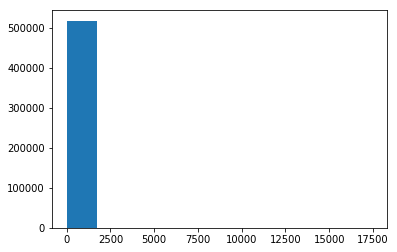

In [78]:
plt.hist(new_df['poolsizesum'][new_df.poolsizesum!=0])

In [79]:
new_df[['calculatedfinishedsquarefeet','finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet6',
       'finishedsquarefeet50']].isnull().sum()

calculatedfinishedsquarefeet      55568
finishedsquarefeet12             276047
finishedsquarefeet13            2977670
finishedsquarefeet15            2794535
finishedsquarefeet6             2963339
finishedsquarefeet50            2782619
dtype: int64

finishedsquarefeet50 and finishedfloor1squarefeet are the exactly the same information according to the dictionary descriptions, remove finishedsquarefeet50 as it has more missing values

calculatedfinishedsquarefeet has the fewest missing values so lets remove the others, note also that except for finishedsquarefeet12 the rest have large amount of missing values

finishedsquarefeet12 and finishedsquarefeet13 have basically same meaning, remove finishedsquarefeet13 for its large amount of missing values

finishedsquarefeet15 - Total area so it contains finishedsquarefeet6--Base unfinished and finished area, remove finishedsquarefeet6



In [80]:
new_df = new_df.drop(['finishedsquarefeet13','finishedsquarefeet6','finishedsquarefeet50'], axis=1)

### check current features

In [81]:
new_df.shape

(2985342, 49)

In [82]:
num_features = new_df.select_dtypes(include=['float']).copy()
category_features = new_df.select_dtypes(include=['object','category'])

In [83]:
print(num_features.shape)
print(category_features.shape)

(2985342, 40)
(2985342, 7)


### check colinearity with vif


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

In [ ]:
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

In [ ]:
num_filled = num_features.fillna(-999)

In [ ]:
vif_cal = calculate_vif_(num_filled)

In [ ]:
vif_df = pd.DataFrame()
vif_df['variables'] = vif_cal.keys()
vif_df['vifScore'] = vif_cal.values()
vif_df = vif_df.sort_values(by=['vifScore'],ascending=False)
without_cl = vif_df[vif_df["vifScore"]<=5]
with_cl  = vif_df[vif_df["vifScore"]>5]

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=without_cl,x="vifScore",y="variables",ax=ax1,orient="h")
sns.barplot(data=with_cl,x="vifScore",y="variables",ax=ax2,orient="h")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Variables without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables with Multicollinearity")

In [ ]:
with_cl

In [ ]:
#import re 

In [ ]:
#def remove_quot(a):
    #a = re.sub("[']",'',a)
    #return a 

In [ ]:
#dic.Feature = dic.Feature.apply(remove_quot)

### check distribution of logerror

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(range(new_df.shape[0]), np.sort(new_df.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

In [ ]:
ulimit = np.percentile(new_df.logerror.values, 99)
llimit = np.percentile(new_df.logerror.values, 1)
new_df['logerror'][new_df['logerror']>ulimit] = ulimit
new_df['logerror'][new_df['logerror']<llimit] = llimit

plt.figure(figsize=(10,8))
sns.distplot(new_df.logerror.values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

### explore correlations with y

In [ ]:
for_plot = num_filled.drop(['logerror'],axis =1 )

In [ ]:
labels = []
values = []
for col in range(len(for_plot.columns)):
    #print(half_29[col])
    labels.append(for_plot.columns[col])
    values.append(np.corrcoef(for_plot.iloc[:,col].values, new_df.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.barplot(corr_df['corr_values'], corr_df['col_labels'] )
plt.yticks(fontsize = 12)
plt.title('correlation bar chart',fontsize = 15)
plt.show

In [ ]:
#pick features which are highly correlated with logerror
corr_df_sel = corr_df[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]

In [ ]:
y_correlated_features = num_filled[corr_df_sel.iloc[:,0].tolist()]
y_correlated_features['log_error'] = new_df['logerror']

In [ ]:
y_correlated_features.columns

In [ ]:
f = sns.pairplot(y_correlated_features,diag_kind="kde", markers=".",
            plot_kws=dict(s=50, edgecolor="skyblue", linewidth=0.5),
            diag_kws=dict(shade=True),y_vars=['log_error'],
            x_vars=['pooltypeid7', 'taxamount', 'pooltypeid2', 'taxdelinquencyyear',
       'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12'],height=5)
f.fig.set_size_inches(15,8)

### correlations between variables

In [ ]:
mask = np.zeros_like(num_filled.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(num_filled.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})

In [86]:
new_df.to_csv('prop_2016_featureEngineered.csv')

### regression